In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the Data

In [3]:
encodings_to_try = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']

for encoding in encodings_to_try:
    try:
        data = pd.read_csv('Play Store Data.csv', encoding=encoding)
        print("File Read Successfully with Encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("UnicodeDecodeError Encountered with Encoding:", encoding)

UnicodeDecodeError Encountered with Encoding: utf-8
File Read Successfully with Encoding: latin-1


In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & Scrapbook,Art_And_Design,4.1,159,19M,10000,Free,Everyone,Art & Design,07-01-2018,1.0.0,4.0.3 and Up
1,Coloring Book Moana,Art_And_Design,3.9,967,14M,500000,Free,Everyone,Art & Design;Pretend Play,15-01-2018,2.0.0,4.0.3 and Up
2,"U Launcher Lite Â Free Live Cool Themes, Hid...",Art_And_Design,4.7,87510,8.7M,5000000,Free,Everyone,Art & Design,01-08-2018,1.2.4,4.0.3 and Up
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644,25M,50000000,Free,Teen,Art & Design,08-06-2018,Varies with Device,4.2 and Up
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967,2.8M,100000,Free,Everyone,Art & Design;Creativity,20-06-2018,1.1,4.4 and Up


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9365 entries, 0 to 9364
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9365 non-null   object 
 1   Category        9365 non-null   object 
 2   Rating          9365 non-null   float64
 3   Reviews         9365 non-null   int64  
 4   Size            9365 non-null   object 
 5   Installs        9365 non-null   int64  
 6   Type            9365 non-null   object 
 7   Content Rating  9365 non-null   object 
 8   Genres          9365 non-null   object 
 9   Last Updated    9365 non-null   object 
 10  Current Ver     9361 non-null   object 
 11  Android Ver     9363 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 878.1+ KB


In [6]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9360,Fr Calculator,Family,4.0,7,2.6M,500,Free,Everyone,Education,18-06-2017,1.0.0,4.1 and Up
9361,Sya9A Maroc - Fr,Family,4.5,38,53M,5000,Free,Everyone,Education,25-07-2017,1.48,4.1 and Up
9362,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.6M,100,Free,Everyone,Education,06-07-2018,1,4.1 and Up
9363,The Scp Foundation Db Fr Nn5N,Books_And_Reference,4.5,114,Varies with device,1000,Free,Mature 17+,Books & Reference,19-01-2015,Varies with Device,Varies with device
9364,Ihoroscope - 2018 Daily Horoscope & Astrology,Lifestyle,4.5,398307,19M,10000000,Free,Everyone,Lifestyle,25-07-2018,Varies with Device,Varies with device


In [7]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4764,Best Applock - Locker & No Ads,Productivity,4.7,10672,6.9M,100000,Free,Everyone,Productivity,23-06-2018,2.1.1,4.1 and Up
9156,Fk Å½EljezniäAr,Sports,4.9,1420,20M,10000,Free,Everyone,Sports,12-07-2018,2.5.0,4.2 and Up
5502,Long Realty Az Home Search,Lifestyle,4.4,132,33M,10000,Free,Everyone,Lifestyle,06-03-2018,5.805.180306,4.1 and Up
4540,Wpsapp,Tools,4.4,95080,3.1M,10000000,Free,Everyone,Tools,03-08-2018,1.6.22,4.1 and Up
2915,"Thescore: Live Sports Scores, News, Stats & Vi...",Sports,4.4,133833,34M,10000000,Free,Everyone 10+,Sports,25-07-2018,6.17.2,4.4 and Up


In [8]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'], format='%d-%m-%Y')

In [9]:
# Replace 'Varies with device' with NaN
data['Size'] = data['Size'].replace('Varies with device', pd.NA)

# Extract Numeric Values and Suffixes
numeric_values = data['Size'].str.extract(r'(\d*\.?\d+)\s?([Mk]*)')

# Convert Numeric Values to Float
data['Size'] = pd.to_numeric(numeric_values[0], errors='coerce')

# Convert KB to MB
data.loc[numeric_values[1] == 'k', 'Size'] /= 1024

# Create a New Column 'App Size in MB' 
data['App Size in MB'] = data['Size']

In [10]:
data.drop(columns=['Size'], inplace=True)

In [11]:
data.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App Size in MB
0,Photo Editor & Candy Camera & Grid & Scrapbook,Art_And_Design,4.1,159,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and Up,19.0
1,Coloring Book Moana,Art_And_Design,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and Up,14.0
2,"U Launcher Lite Â Free Live Cool Themes, Hid...",Art_And_Design,4.7,87510,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and Up,8.7
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644,50000000,Free,Teen,Art & Design,2018-06-08,Varies with Device,4.2 and Up,25.0
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and Up,2.8


In [12]:
data.tail()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App Size in MB
9360,Fr Calculator,Family,4.0,7,500,Free,Everyone,Education,2017-06-18,1.0.0,4.1 and Up,2.6
9361,Sya9A Maroc - Fr,Family,4.5,38,5000,Free,Everyone,Education,2017-07-25,1.48,4.1 and Up,53.0
9362,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,100,Free,Everyone,Education,2018-07-06,1,4.1 and Up,3.6
9363,The Scp Foundation Db Fr Nn5N,Books_And_Reference,4.5,114,1000,Free,Mature 17+,Books & Reference,2015-01-19,Varies with Device,Varies with device,NaN
9364,Ihoroscope - 2018 Daily Horoscope & Astrology,Lifestyle,4.5,398307,10000000,Free,Everyone,Lifestyle,2018-07-25,Varies with Device,Varies with device,19.0


In [13]:
data.sample(5)

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App Size in MB
675,Free Intellectual Training Game Application |,Education,4.2,5741,1000000,Free,Everyone,Education;Pretend Play,2018-07-25,3.7.0,4.4 and Up,84.000000
4990,Book Of Ak-47,Lifestyle,3.8,6,500,Free,Everyone,Lifestyle,2016-03-01,1.0.2,4.0.3 and Up,3.400000
189,Alba Heaven - Alvarez Job Portal Services,Business,4.0,8941,5000000,Free,Everyone,Business,2018-07-31,4.6.30,4.0.3 and Up,12.000000
6535,"Cystic Fibrosis Symptoms, Doctors & Treatments",Health_And_Fitness,4.7,6,100,Free,Teen,Health & Fitness,2018-04-24,1.0.7,5.0 and Up,9.700000
4769,Ad Removal: Thereisonlywe,Productivity,3.4,16,100,Paid,Everyone,Productivity,2014-05-03,1,2.2 and Up,0.286133


In [14]:
# Calculate the Median of the 'App Size in MB' column
median_size = data['App Size in MB'].median()

# Replace NaN values with the Median
data['App Size in MB'].fillna(median_size, inplace=True)

In [15]:
data.tail()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App Size in MB
9360,Fr Calculator,Family,4.0,7,500,Free,Everyone,Education,2017-06-18,1.0.0,4.1 and Up,2.6
9361,Sya9A Maroc - Fr,Family,4.5,38,5000,Free,Everyone,Education,2017-07-25,1.48,4.1 and Up,53.0
9362,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,100,Free,Everyone,Education,2018-07-06,1,4.1 and Up,3.6
9363,The Scp Foundation Db Fr Nn5N,Books_And_Reference,4.5,114,1000,Free,Mature 17+,Books & Reference,2015-01-19,Varies with Device,Varies with device,14.0
9364,Ihoroscope - 2018 Daily Horoscope & Astrology,Lifestyle,4.5,398307,10000000,Free,Everyone,Lifestyle,2018-07-25,Varies with Device,Varies with device,19.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9365 entries, 0 to 9364
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9365 non-null   object        
 1   Category        9365 non-null   object        
 2   Rating          9365 non-null   float64       
 3   Reviews         9365 non-null   int64         
 4   Installs        9365 non-null   int64         
 5   Type            9365 non-null   object        
 6   Content Rating  9365 non-null   object        
 7   Genres          9365 non-null   object        
 8   Last Updated    9365 non-null   datetime64[ns]
 9   Current Ver     9361 non-null   object        
 10  Android Ver     9363 non-null   object        
 11  App Size in MB  9365 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 878.1+ KB


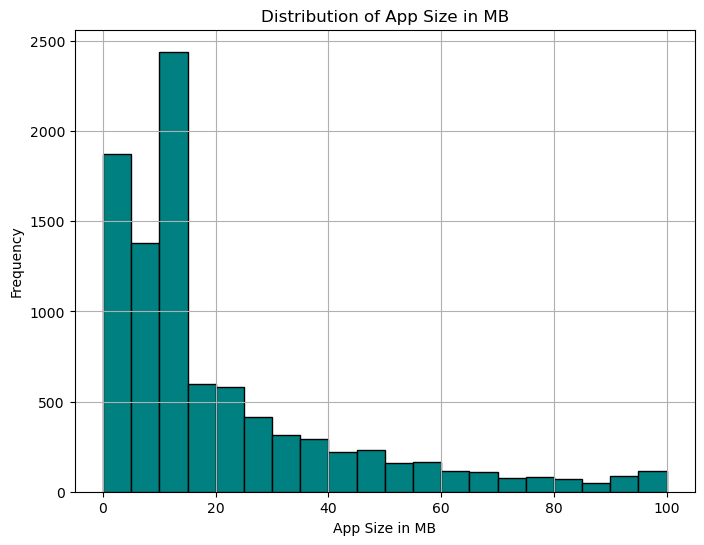

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(data['App Size in MB'], bins=20, color='teal', edgecolor='black')

plt.title('Distribution of App Size in MB')
plt.xlabel('App Size in MB')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:
def categorize_size(size):
    if size < 10:
        return 'Small'
    elif size >= 10 and size <= 50:
        return 'Medium'
    else:
        return 'Large'

In [19]:
data['App Size Category'] = data['App Size in MB'].apply(categorize_size)

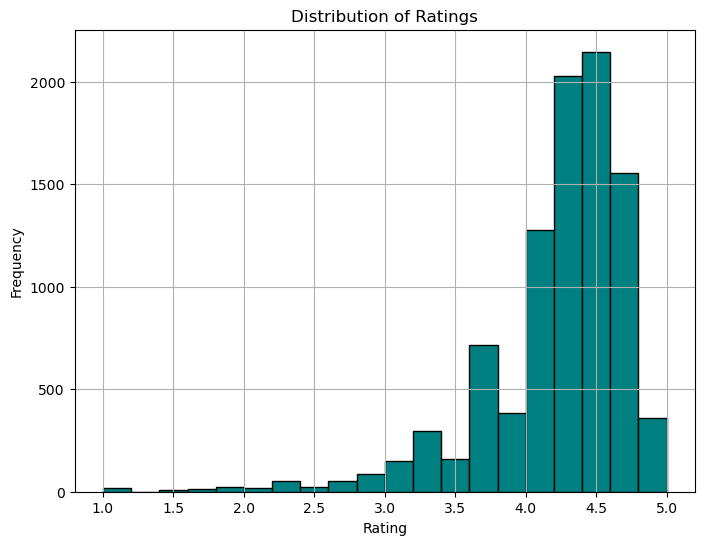

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(data['Rating'], bins=20, color='teal', edgecolor='black')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [21]:
def categorize_rating(rating):
    if rating < 3:
        return 'Poor'
    elif rating == 3:
        return 'Average'
    elif rating > 3 and rating < 4:
        return 'Good'
    else:
        return 'Excellent'

data['Rating Category'] = data['Rating'].apply(categorize_rating)

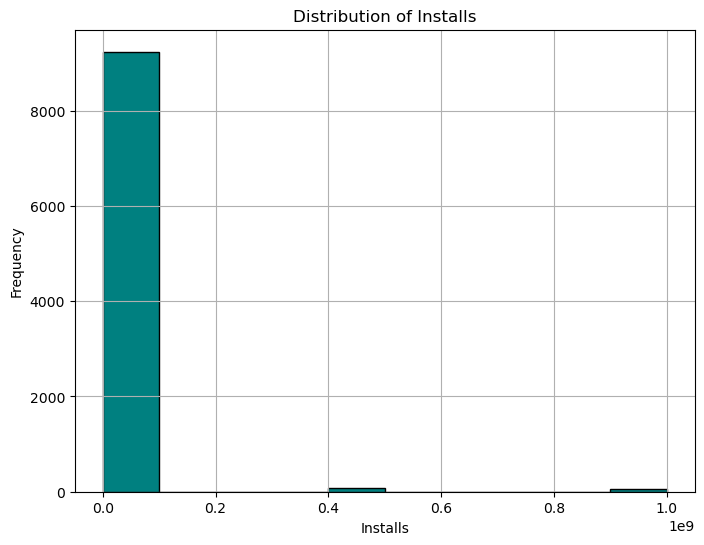

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(data['Installs'], color='teal', edgecolor='black')

plt.title('Distribution of Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [23]:
data['Installs'].describe()

count    9.365000e+03
mean     1.789935e+07
std      9.124290e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [24]:
def categorize_installs(installs):
    if installs <= 10000:
        return 'Low'
    elif installs <= 100000:
        return 'Medium'
    elif installs <= 1000000:
        return 'High'
    else:
        return 'Very High'

data['Install Category'] = data['Installs'].apply(categorize_installs)

In [25]:
data.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App Size in MB,App Size Category,Rating Category,Install Category
0,Photo Editor & Candy Camera & Grid & Scrapbook,Art_And_Design,4.1,159,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and Up,19.0,Medium,Excellent,Low
1,Coloring Book Moana,Art_And_Design,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and Up,14.0,Medium,Good,High
2,"U Launcher Lite Â Free Live Cool Themes, Hid...",Art_And_Design,4.7,87510,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and Up,8.7,Small,Excellent,Very High
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644,50000000,Free,Teen,Art & Design,2018-06-08,Varies with Device,4.2 and Up,25.0,Medium,Excellent,Very High
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and Up,2.8,Small,Excellent,Medium


In [26]:
data['Popularity Index'] = data['Reviews'] + data['Installs']

In [27]:
data.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App Size in MB,App Size Category,Rating Category,Install Category,Popularity Index
0,Photo Editor & Candy Camera & Grid & Scrapbook,Art_And_Design,4.1,159,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and Up,19.0,Medium,Excellent,Low,10159
1,Coloring Book Moana,Art_And_Design,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and Up,14.0,Medium,Good,High,500967
2,"U Launcher Lite Â Free Live Cool Themes, Hid...",Art_And_Design,4.7,87510,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and Up,8.7,Small,Excellent,Very High,5087510
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644,50000000,Free,Teen,Art & Design,2018-06-08,Varies with Device,4.2 and Up,25.0,Medium,Excellent,Very High,50215644
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and Up,2.8,Small,Excellent,Medium,100967


In [28]:
data['Type'].value_counts()

Type
Free    8718
Paid     647
Name: count, dtype: int64

In [29]:
for column in data.columns:
    print(f"Value Counts for Column '{column}':")
    print(data[column].value_counts())
    print()

Value Counts for Column 'App':
App
Roblox                                               9
Cbs Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
                                                    ..
Ost)                                                 1
Preschool All-In-One                                 1
K-Chiing Vpn (Free)                                  1
K.Moji                                               1
Ihoroscope - 2018 Daily Horoscope & Astrology        1
Name: count, Length: 8179, dtype: int64

Value Counts for Column 'Category':
Category
Family                 1747
Game                   1097
Tools                   734
Productivity            351
Medical                 350
Communication           328
Finance                 323
Sports                  319
Photography             317
Personalization       

In [30]:
data['Current Ver'].value_counts()

Current Ver
Varies with Device    1415
1                      476
1.1                    206
1.2                    133
2                      129
                      ... 
1.0.34                   1
4.1.11 - Hegoa           1
12.2.7.3671              1
8.50.935520              1
0.3.4                    1
Name: count, Length: 2594, dtype: int64

In [31]:
data['Android Ver'].value_counts()

Android Ver
4.1 and Up            2059
Varies with device    1319
4.0.3 and Up          1240
4.0 and Up            1131
4.4 and Up             875
2.3 and Up             582
5.0 and Up             534
4.2 and Up             338
2.3.3 and Up           240
3.0 and Up             211
2.2 and Up             208
4.3 and Up             207
2.1 and Up             113
1.6 and Up              87
6.0 and Up              48
7.0 and Up              41
3.2 and Up              31
2.0 and Up              27
5.1 and Up              18
1.5 and Up              16
3.1 and Up               8
2.0.1 and Up             7
4.4W and Up              6
8.0 and Up               5
7.1 and Up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and Up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [32]:
def group_android_version(version):
    if pd.isnull(version): 
        return version
    elif version.startswith('4'):
        return '4.0 and Up'
    elif version.startswith('5'):
        return '5.0 and Up'
    elif version.startswith('6'):
        return '6.0 and Up'
    elif version.startswith('7'):
        return '7.0 and Up'
    elif version.startswith('8'):
        return '8.0 and Up'
    elif version.startswith('9'):
        return '9.0 and Up'
    else:
        return version


data['Android Ver'] = data['Android Ver'].map(group_android_version)

In [33]:
data['Android Ver'].value_counts()

Android Ver
4.0 and Up            5859
Varies with device    1319
2.3 and Up             582
5.0 and Up             555
2.3.3 and Up           240
3.0 and Up             211
2.2 and Up             208
2.1 and Up             113
1.6 and Up              87
6.0 and Up              48
7.0 and Up              45
3.2 and Up              31
2.0 and Up              27
1.5 and Up              16
3.1 and Up               8
2.0.1 and Up             7
8.0 and Up               5
1.0 and Up               2
Name: count, dtype: int64

In [34]:
data.sample(5)

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App Size in MB,App Size Category,Rating Category,Install Category,Popularity Index
2880,"Cbs Sports App - Scores, News, Stats & Watch Live",Sports,4.3,91031,5000000,Free,Everyone,Sports,2018-08-04,Varies with Device,5.0 and Up,14.0,Medium,Excellent,Very High,5091031
8487,Masha And The Bear. Games For Kids,Family,4.6,6231,1000000,Free,Everyone,Educational;Pretend Play,2018-07-13,2.6,4.0 and Up,31.0,Medium,Excellent,High,1006231
7670,Dp Editor,Photography,4.3,18,5000,Free,Teen,Photography,2018-08-04,1.5,4.0 and Up,15.0,Medium,Excellent,Low,5018
7825,Ds Thermometer,Weather,3.7,631,100000,Free,Everyone,Weather,2015-05-30,2.2,2.3 and Up,3.0,Small,Good,Medium,100631
3476,Accuweather: Daily Forecast & Live Weather Rep...,Weather,4.4,2053404,50000000,Free,Everyone,Weather,2018-08-06,Varies with Device,Varies with device,14.0,Medium,Excellent,Very High,52053404


In [35]:
data.sample(5)

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App Size in MB,App Size Category,Rating Category,Install Category,Popularity Index
482,Free Dating App & Flirt Chat - Cheers,Dating,4.4,667,10000,Free,Mature 17+,Dating,2018-08-03,1.308.us,4.0 and Up,27.0,Medium,Excellent,Low,10667
3772,Supercity: Build A Story,Family,4.4,98324,1000000,Free,Everyone,Simulation,2018-07-28,1.19.1,4.0 and Up,70.0,Large,Excellent,High,1098324
2621,Urban Outfitters,Shopping,4.2,4158,500000,Free,Teen,Shopping,2018-07-02,2.8,4.0 and Up,23.0,Medium,Excellent,High,504158
7434,Dg Tv,News_And_Magazines,5.0,3,100,Free,Everyone,News & Magazines,2018-05-26,1.2,4.0 and Up,5.7,Small,Excellent,Low,103
2974,Google Trips - Travel Planner,Travel_And_Local,4.1,26871,5000000,Free,Everyone,Travel & Local,2018-07-26,1.10.0.205086730,4.0 and Up,14.0,Medium,Excellent,Very High,5026871


In [36]:
android_ver_counts = data['Android Ver'].value_counts()

# List of Android Versions with Value Counts Less than 100
android_ver_other = android_ver_counts[android_ver_counts < 100].index.tolist()

# Update 'Android Ver' Column to Include 'Other' Category
data['Android Version2'] = data['Android Ver'].apply(lambda x: 'Other' if x in android_ver_other else x)

# Display the Value Counts for the Updated 'Android Version2' Column
print(data['Android Version2'].value_counts())

Android Version2
4.0 and Up            5859
Varies with device    1319
2.3 and Up             582
5.0 and Up             555
Other                  276
2.3.3 and Up           240
3.0 and Up             211
2.2 and Up             208
2.1 and Up             113
Name: count, dtype: int64


In [37]:
data['Current Ver'].value_counts()

Current Ver
Varies with Device    1415
1                      476
1.1                    206
1.2                    133
2                      129
                      ... 
1.0.34                   1
4.1.11 - Hegoa           1
12.2.7.3671              1
8.50.935520              1
0.3.4                    1
Name: count, Length: 2594, dtype: int64

In [38]:
# Count the Occurrences of Each Value in the 'Current Ver' Column
current_ver_counts = data['Current Ver'].value_counts()

# Count the Number of Values with a Value Count of One
num_single_occurrences = (current_ver_counts == 1).sum()

print("Number of Values with a Value Count of one in 'Current Ver' column:", num_single_occurrences)

Number of Values with a Value Count of one in 'Current Ver' column: 1659


In [39]:
# Define function to aggregate values by first digit in 'Current Ver'
def aggregate_by_first_digit(version):
    if pd.isnull(version):  # If it's NaN, return NaN
        return version
    else:
        first_digit = version.split('.')[0]
        return first_digit + '.x.x'

# Apply the aggregation function to 'Current Ver' column
data['Current Ver Aggregated'] = data['Current Ver'].map(aggregate_by_first_digit)

# Display the value counts for the updated 'Current Ver Aggregated' column
print(data['Current Ver Aggregated'].value_counts())

Current Ver Aggregated
1.x.x                       3492
Varies with Device.x.x      1415
2.x.x                       1393
3.x.x                        811
4.x.x                        584
                            ... 
1900001.x.x                    1
1009001.x.x                    1
a.x.x                          1
5055.x.x                       1
3rd Release Aug 2016.x.x       1
Name: count, Length: 183, dtype: int64


In [40]:
# Count the Occurrences of Each Value in the 'Current Ver' Column
current_ver_counts = data['Current Ver Aggregated'].value_counts()

# Count the Number of Values with a Value Count of One
num_single_occurrences = (current_ver_counts == 1).sum()

print("Number of Values with a Value Count of one in 'Current Ver' column:", num_single_occurrences)

Number of Values with a Value Count of one in 'Current Ver' column: 113


In [41]:
data.to_csv('Clean_Google_Data.csv', index=False)